# НИР. Множественное выравнивание границ экзон-интрон и интрон-экзон

## 1.Границы экзон-интрон и интрон-экзон

В качестве исходной молекулы ДНК выбрана человеческая хромосома-1

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd
import os
import random

### Получение границ

Загрузка хромосомы в колаб и выделение регионов:

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# path = '/content/gdrive/My Drive/Универ/УИР/data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# os.chdir(r"{}".format(path))
# files = os.listdir()
# files

['Homo_sapiens.GRCh38.107.chromosome.1.gff3',
 'Homo_sapiens.GRCh38.dna.chromosome.1.fa',
 'borders',
 'methods',
 'searching']

In [ ]:
# with open('Homo_sapiens.GRCh38.107.chromosome.1.gff3', 'r') as file:
#   regions = ''.join(file.readlines()).split('###\n')[1:]

Выделение среди регионов участков ген:

In [ ]:
# genes = []

# for region in regions:
#   if '	gene	' in region:
#     genes.append(region)
  
# genes

Каждый ген кодирует несколько альтернативно сплайсированных транскрипта. Для каждого из них выделяются границы экзонов:

In [ ]:
# mrna_exons_list = []

# for gene in genes:
#   i_mRNAs = gene.split('	mRNA	')[1:]
  
#   for i_mRNA in i_mRNAs:
#     seq_regions = i_mRNA.split('\n')[1:]
    
#     exons = []
#     for seq_region in seq_regions:
#       if '	exon	' in seq_region:
#         header = seq_region.split('\t')
      
#         start  = int(header[3])
#         end    = int(header[4])
#         parent_id = header[8].split(';')[0].split(':')[1]

#         exon_dict = {'start':     start, 
#                      'end':       end,
#                      'parent_id': parent_id}
#         exons.append(exon_dict)
      
#       mrna_exons_list.append(exons)

In [ ]:
# mrna_exons_list

Создания списка границ экзон-интрон и интрон-экзон длиной 100:

In [ ]:
# with open('Homo_sapiens.GRCh38.dna.chromosome.1.fa', 'r') as file:
#   lines = ''.join(''.join(file.readlines()[1:]).split('\n'))

# len(lines)

248956422

In [ ]:
# # границы
# exon_intron = []
# intron_exon = []

# for exons in mrna_exons_list:
#   for exon in exons[:-1]:
#     index = exon['end'] - 1
#     exon_intron.append(lines[index - 49 : index + 51])
  
#   for exon in exons[1:]:
#     index = exon['start'] -1
#     intron_exon.append(lines[index - 50 : index + 50])

In [ ]:
# len(intron_exon)

In [ ]:
# len(exon_intron)

In [ ]:
# len(exon_intron[0])

Сохранение в файл:

In [ ]:
# with open(f'./borders/exon_intron.fasta', 'a') as file:
#   for i in range(len(intron_exon)):
#     file.write(f'>{i}\n')
#     file.write(intron_exon[i] + '\n\n')

# with open(f'./borders/intron_exon.fasta', 'a') as file:
#   for i in range(len(exon_intron)):
#     file.write(f'>{i}\n')
#     file.write(exon_intron[i] + '\n\n')

### Получение выборки

In [ ]:
# exon_intron_rdm = []
# intron_exon_rdm = []
# data_size = 150


# for i in range(data_size):
#   exon_intron_rdm.append(random.choice(exon_intron))
#   intron_exon_rdm.append(random.choice(intron_exon))

In [ ]:
# # exon_intron = '\n\n'.join(exon_intron)
# # intron_exon = '\n\n'.join(intron_exon)

# with open(f'./borders/exon_intron_{data_size}.fasta', 'a') as file:
#   for i in range(len(exon_intron_rdm)):
#     file.write(f'>{i}\n')
#     file.write(exon_intron_rdm[i] + '\n\n')

# with open(f'./borders/intron_exon_{data_size}.fasta', 'a') as file:
#   for i in range(len(intron_exon_rdm)):
#     file.write(f'>{i}\n')
#     file.write(intron_exon_rdm[i] + '\n\n')

Таким образом, из хромосомы были выделены границы экзон-интрон и интрон-экзон. Для проведения множественного выравнивания алгоритмом MAHDS были составлены выборки из 100/300/500 элементов для каждого вида границы.

## 2.Множественное выравнивание

### Алгоритм MAHDS

Ресурсы:
1.	Korotkov, E.V.; Suvorova, Y.M.; Kostenko, D.O.; Korotkova, M.A. Multiple Alignment of Promoter Sequences from the Arabidopsis thaliana L. Genome. Genes 2021, 12, 135.
2. Pugacheva, V.; Korotkov, A.; Korotkov, E. Search of latent periodicity in amino acid sequences by means of genetic algorithm and
dynamic programming. Stat. Appl. Genet. Mol. Biol. 2016, 15, 381–400.
3. Eugene V. Korotkov, Yulia. M. Suvorova, Anna V. Nezhdanova, Sofia E. Gaidukova, Irina V. Yakovleva, Anastasia M. Kamionskaya and Maria A. Korotkova Mathematical Algorithm for Identification of Eukaryotic
Promoter Sequences
4. A General Method Applicable to the Search for Similarities 
in the Amino Acid Sequence of Two Proteins SAUL B. NEEDLEMANLND CHRISTIAN D. WIJNCH Department of Biochemistry, Northwestern University, and Nuclear Medicine Service, V. A. Research Hospital Chicago, Ill. 60611, U.S.A. (Received 21 July 1969) 

Множественное выравнивание алгоритмом MAHDS проводилось на сайте: http://victoria.biengi.ac.ru/mahds/auth

<p>Качество выравнивания определяется Z-оценкой. Достигнуть лучшей оценки можно изменив величину штрафа за вставку/делецию.</p>

<p>Для каждого типа границ были созданы 5 произвольных выборки размером 100. Малый размер выборок позволяет сэкономить время на работе алгоритма, а их количество - эмпирически найти точку (значение штрафа), в которой z-оценка достигает максимум.</p>

<p>Из результатов можно предположить монотонную зависимость z-оценки и длины выравнивания от цены вставки/деления. Лучшие оценки получены для цены 50.</p>

<p>Далее, проведены множественные выравнивания с ценой вставка/деления 50 для случайных выборок 100/300/500 элементов. Полученные результаты сохранены в файл.</p>

##### Форматирование полученных результатов к формату fasta


In [ ]:
# path = '/content/gdrive/My Drive/Универ/УИР/data/'
# prep_path = path + 'mahds/graph_exp/prep/'
# formatted_path = path + 'mahds/graph_exp/formatted/'

In [ ]:
# # os.chdir(r"{}".format(prep_path))
# os.listdir()

['exon_intron_500_50.fasta',
 'exon_intron_500_33.fasta',
 'exon_intron_500_25.fasta',
 'exon_intron_100_50.fasta',
 'exon_intron_500_41.fasta',
 'exon_intron_100_33.fasta',
 'exon_intron_300_41.fasta',
 'exon_intron_100_41.fasta',
 'exon_intron_300_25.fasta',
 'exon_intron_300_50.fasta',
 'exon_intron_300_33.fasta',
 'exon_intron_100_25.fasta']

In [ ]:
# file_name = 'intron_exon_500.fasta'
# fasta_line = '' 

# with open(prep_path + file_name, 'r') as file:
#   lines = ''.join(file.readlines()[1:-1]).split('<br>&gt;')[1:]

#   # for line in lines:
#   #   header = '>' + line.split('<br>')[0] + '\n'
#   #   align_line = ''.join(line.split('<br>')[1:]) + '\n\n'
#   #   fasta_line += header + align_line

# # with open(formated_path + file_name, 'w') as file:
# #   file.write(fasta_line)
# lines

In [ ]:
# for file_name in os.listdir():
#   fasta_line = '' 

#   with open(prep_path + file_name, 'r') as file:
#     lines = ''.join(file.readlines()[1:-1]).split('<br>&gt;')[1:]
#     for line in lines:
#       header = '>' + line.split('<br>')[0] + '\n'
#       align_line = ''.join(line.split('<br>')[1:]) + '\n\n'
#       fasta_line += header + align_line

#   with open(formatted_path + file_name, 'w') as file:
#     file.write(fasta_line)

In [ ]:
# for file_name in os.listdir():
#   fasta_line = '' 

#   with open(prep_path + file_name, 'r') as file:
#     lines = file.readlines()[1:-1]
#     if len(''.join(lines).split('<br>&gt;')[1:]) != 0:
#       lines = ''.join(lines).split('<br>&gt;')[1:]
#     else:
#       lines = ''.join(lines).split('<br>>')[1:]
#     for line in lines:
#       header = '>' + line.split('<br>')[0] + '\n'
#       align_line = ''.join(line.split('<br>')[1:]) + '\n\n'
#       fasta_line += header + align_line

#   with open(formatted_path + file_name, 'w') as file:
#     file.write(fasta_line)

### Алгоритм HMMER

<p>HMMER - алгоритм, реализованный на принципе скрытых марковских моделей.</p>
<p>Перед тем, как выполнить множественное выравнивание, необходимо создать профиль. Профиль характеризует вероятностную модель появления того или иного элемента в последовательности. Профиль создается из лучшего множественного выравнивания.</p>

##### Форматирование fasta-файлов лучших выравниваний в sto-файлы

In [ ]:
# path = '/content/gdrive/My Drive/Универ/УИР/data/methods/tcoffee/align/'
# # formated_path = path + 'mahds/exp/graph/formatted/'
# # sto_path = path + 'mahds/exp/graph/to_sto/'

In [ ]:
# os.chdir(r"{}".format(path))
# files = os.listdir()[3:]
# files

['exon_intron_150.fasta', 'intron_exon_150.fasta']

In [ ]:
# os.getcwd()

'/content/gdrive/MyDrive/Универ/УИР/data/mahds/exp/graph/formatted'

In [ ]:
# for file_name_fa in files:
#   with open(file_name_fa, 'r') as file_fa:
#     lines = file_fa.readlines()[1:]
#     file_name_sto = file_name_fa.split('.')[0] + '.sto'

#     with open(file_name_sto, 'w') as file_sto:
#       file_sto.write('# STOCKHOLM 1.0\n\n')
      
#       num = 0
#       for i in range(0, len(lines) - 1, 3):
#         num += 1
#         file_sto.write(f'JJ{num} ' + lines[i].replace('-', '.'))

#       file_sto.write('//')

##### Получение профиля и множественное выравнивание
```
hmmbuild file.hmm file.sto
hmmsearch file.hmm file.fasta > file.out
```

<p>Для проверки работы алгоритма был создан файл c одной последовательностью из выравнивания, повторяющуюся N-раз (100/300/500).</p>
<p>В результате алгоритмом найдены участки в хромосоме, соответствующие профилю.</p>

<p>Затем, для полученных лучших выравниваний выборок размером 100/300/500 были построены профили, и далее передан алгоритму файл с исследуемой последовательностью.</p>

Однако, HMMER не выдал ожидаемого результата:
```
   [No hits detected that satisfy reporting thresholds]

Domain annotation for each sequence (and alignments):

   [No targets detected that satisfy reporting thresholds]
```

### Графики распределений
Чтобы выяснить причину такого вывода, было принято решение построить график распределения ....


1. Подсчет количества каждого нуклеотида в столбце, $m_i^j$, и общего числа нуклеотидов в столбце $M(i) = \sum_{j=1}^{4}{m_i^j}$, <p>где $ j = \{A, G, T, C\}, \: i = 1..100$;</p>
2. Зануление разреженных столбцов при условии $M(i) < \frac{L}{2}$, где L - количество последовательностей. Получим новую длину последовательностей;
3. Подсчет общего количества нуклеотидов N и вероятностей для каждого в отдельности: $P_i = \frac{n_i}{N}$, <p>где $n_i = \sum_{j=0}^{j=N}{m_i^j}, \: i = \{A, G, T, C\}$;</p>
4. Подсчет хи-квадрат величины:
$$
\chi^2(i) = \sum_{j=1}^{j=4} \frac{(m_j^i - M(i)P_j)^2}{M(i)P_j}
$$

5. Перемешать нуклеотиды и посчитать фоновый шум.






В силу центральной предельной теоремы, при большом числе степеней свободы распределение случайной величины $Y \sim \chi^{2}(k)$ может быть приближено нормальным $ Y \approx N(k,2k)$. Более точно $ \frac{Y - k}{\sqrt{2k}} \to N(0,1)$ по распределению при $ k \to \infty $.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import chi2, gaussian_kde

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/My Drive/Универ/УИР/data/'

Mounted at /content/gdrive


In [ ]:
# Чтение и обработка файла

def preproc(file_name):
  with open(file_name, 'r') as file:
    lines = ''.join(file.readlines()[2:-1]).split('\n')
    lines = ''.join(lines).split('JJ')[1:]
    
    for i in range(len(lines)):
      lines[i] = lines[i].split(' ')[-1]

  return lines

In [ ]:
# Подсчет частот

def frequancy(lines):
  line_len = len(lines[0])
  freq_arr = np.zeros((4, line_len))

  for line in lines:
    for i in range(line_len):
      if line[i] == 'A':
        freq_arr[0][i] += 1
      elif line[i] == 'G':
        freq_arr[1][i] += 1
      elif line[i] == 'T':
        freq_arr[2][i] += 1
      elif line[i] == 'C':
        freq_arr[3][i] += 1

  return freq_arr

In [ ]:
# Подсчет вероятностей

def probability(freq_arr):
  N = freq_arr.sum(axis=0).sum()
  n = freq_arr.sum(axis=1)

  return  n / N

In [ ]:
# Зануление разреженных столбцов

def clean_data(lines, freq_arr):
  M = freq_arr.sum(axis=0)
  L = len(lines)

  M = np.where(M <= L / 2, 0, M)
  freq_arr = np.where(M == 0, 0, freq_arr)
  
  # indexes = np.argwhere(M == 0).flatten()
  
  # indexes_to_drop = np.argwhere(M <= L / 2).flatten()

  # data = np.array(list(''.join(lines))).reshape(len(lines), len(lines[0]))

  # freq_arr = np.delete(freq_arr, indexes_to_drop, 1)
  # data     = np.delete(data, indexes_to_drop, 1)

  return freq_arr

In [ ]:
# Распределение хи-квадрат

def chi_square_dist(freq_arr_clear, prob):
  M = freq_arr_clear.sum(axis=0)

  MP = prob.reshape(-1, 1).dot(M.reshape(1, M.shape[0]))

  X = np.where(M == 0, 0, (freq_arr_clear - MP)**2 / MP)
  return X.sum(axis=0)

In [ ]:
def main(lines):
  # подсчет частот в каждой позиции
  freq_arr = frequancy(lines)
  
  # зануление разреженных столбцов
  freq_arr_clear = clean_data(lines, freq_arr)

  # подсчет вероятностей
  prob = probability(freq_arr_clear)

  # распределение хи-квадрат
  chi_square = chi_square_dist(freq_arr_clear, prob)
  
  return chi_square

##### MAHDS


In [ ]:
cur_path = path + 'borders/sto/'
save_to_path = path + 'searching/graphs/'

In [ ]:
os.chdir(r"{}".format(cur_path))
files = os.listdir()
files

['intron_exon_300.sto',
 'intron_exon_100.sto',
 'exon_intron_500.sto',
 'intron_exon_500.sto',
 'exon_intron_100.sto',
 'exon_intron_300.sto']

In [ ]:
# Исследуемая выборка
file = 'exon_intron_500.sto'
chi_square = ''
label = 'исходная последовательность'


# Получение хи-квадрат величины
file_name = file.split('.')[0]

if file_name.split('_')[0] == 'exon':
  # преобработка
  lines = preproc(file)

  # хи-квадрат распределение
  chi_square = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg = (chi_square - df) / np.sqrt(2 * df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# Фоновый шум
chi_square_noise = ''
label_noise = 'фоновый шум'

# Получение хи-квадрат величины
lines = preproc(file)

line_len = len(lines[0])
lines = ''.join(lines)

data_shuffled = list(''.join(lines.split('.')))
lines = list(lines)

np.random.shuffle(data_shuffled)

index = 0
for i in range(len(lines)):
  if lines[i] != '.':
    lines[i] = data_shuffled[index]
    index += 1

lines = np.array(lines).reshape(500, line_len)
lines = [''.join(line) for line in lines]

chi_square_noise = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg_noise = (chi_square_noise - df) / np.sqrt(2 * df)

# Добавление 3-сигма
label_noise_1 = 'фоновый шум + $3\sigma$'
label_noise_2 = 'фоновый шум - $3\sigma$'

std_noise = np.std(normal_arg_noise)
normal_arg_noise_1 = normal_arg_noise + 3 * std_noise
normal_arg_noise_2 = normal_arg_noise - 3 * std_noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


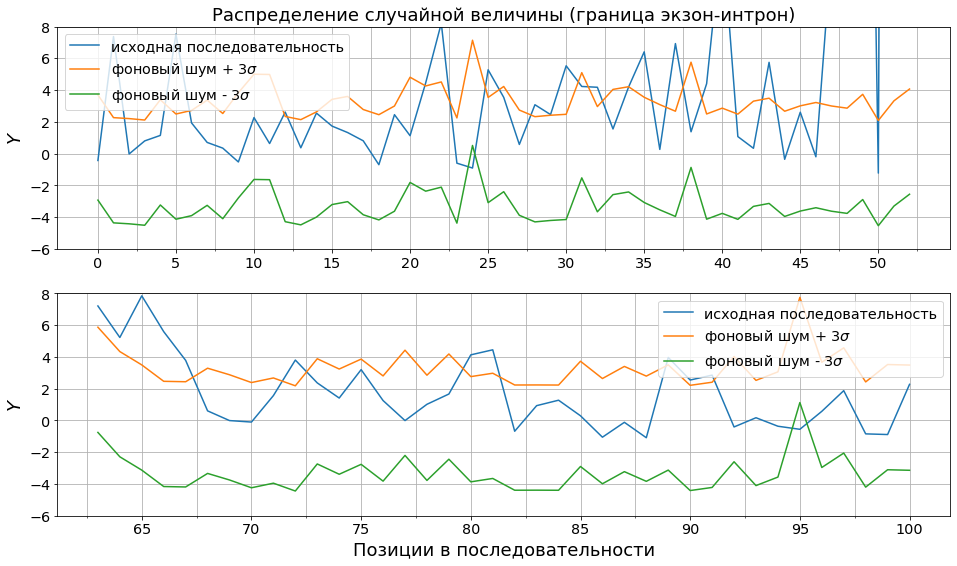

In [ ]:
# Построение графиков

fontsize = 18
fig, axes = plt.subplots(2, 1, figsize=(16,9))

# # общий график
# axes[0].set_ylabel('$Y$', fontsize=fontsize)
# axes[0].plot(normal_arg, label=label)
# axes[0].plot(normal_arg_noise, label=label_noise)
# axes[0].legend(fontsize=fontsize*0.6)

# График в заданных диапазонах
major_ticks_x = np.arange(0, 110, 5)
minor_ticks_x = np.arange(0, 110, 2.5)
major_ticks_y = np.arange(-50, 51, 2)
# minor_ticks_y = np.arange(0, 101, 2)

for i in range(0,2):
  axes[i].set_xticks(major_ticks_x)
  axes[i].set_xticks(minor_ticks_x, minor=True)
  axes[i].set_yticks(major_ticks_y)
  # ax.set_yticks(minor_ticks_y, minor=True)

  axes[i].set_ylim(-6, 8)
  axes[i].set_ylabel('$Y$', fontsize=fontsize)
  axes[i].grid(which='both')


bottom = 63
top = 53

axes[0].set_title('Распределение случайной величины (граница экзон-интрон)', fontsize=fontsize)

axes[0].plot(normal_arg[0:top], label=label)
axes[0].plot(normal_arg_noise_1[0:top], label=label_noise_1)
axes[0].plot(normal_arg_noise_2[0:top], label=label_noise_2)

axes[0].legend(fontsize=fontsize*0.8)
axes[0].tick_params(axis='both', which='major', labelsize=fontsize*0.8)

axes[1].plot(range(bottom, len(normal_arg)), normal_arg[bottom:], label=label)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_1[bottom:], label=label_noise_1)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_2[bottom:], label=label_noise_2)

axes[1].set_xlabel('Позиции в последовательности', fontsize=fontsize)
axes[1].legend(fontsize=fontsize*0.8)
axes[1].tick_params(axis='both', which='major', labelsize=fontsize*0.8)

# axes[1].annotate(s='Y ~ N(0, 1) - нормально распределенная случайная величина', xy=(65, -10), annotation_clip=False, fontsize=fontsize)
# axes[1].annotate(s=f'Размер выборки {len(lines)} последовательностей', xy=(65, -11), annotation_clip=False, fontsize=fontsize)
# axes[1].annotate(s=f'Длина выровненных последовательностей {len(normal_arg)}', xy=(65, -12), annotation_clip=False, fontsize=fontsize)

plt.show
plt.savefig(save_to_path + f'normal_arg_dist_exon_intron.jpeg', bbox_inches='tight')

In [ ]:
# Исследуемая выборка
file = 'intron_exon_500.sto'
chi_square = ''
label = 'исходная последовательность'


# Получение хи-квадрат величины
file_name = file.split('.')[0]

if file_name.split('_')[0] == 'intron':
  # преобработка
  lines = preproc(file)

  # хи-квадрат распределение
  chi_square = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg = (chi_square - df) / np.sqrt(2 * df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# Фоновый шум
chi_square_noise = ''
label_noise = 'фоновый шум'

# Получение хи-квадрат величины
lines = preproc(file)

line_len = len(lines[0])
lines = ''.join(lines)

data_shuffled = list(''.join(lines.split('.')))
lines = list(lines)

np.random.shuffle(data_shuffled)

index = 0
for i in range(len(lines)):
  if lines[i] != '.':
    lines[i] = data_shuffled[index]
    index += 1

lines = np.array(lines).reshape(500, line_len)
lines = [''.join(line) for line in lines]

chi_square_noise = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg_noise = (chi_square_noise - df) / np.sqrt(2 * df)

# Добавление 3-сигма
label_noise_1 = 'фоновый шум + $3\sigma$'
label_noise_2 = 'фоновый шум - $3\sigma$'

std_noise = np.std(normal_arg_noise)
normal_arg_noise_1 = normal_arg_noise + 3 * std_noise
normal_arg_noise_2 = normal_arg_noise - 3 * std_noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


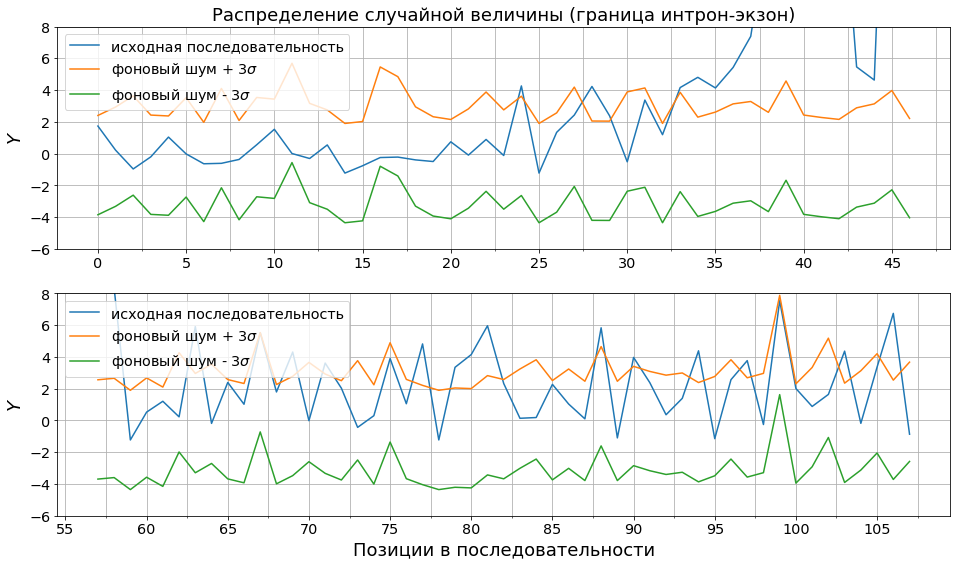

In [ ]:
# Построение графиков

fontsize = 18
fig, axes = plt.subplots(2, 1, figsize=(16,9))

# # общий график
# axes[0].set_ylabel('$Y$', fontsize=fontsize)
# axes[0].plot(normal_arg, label=label)
# axes[0].plot(normal_arg_noise, label=label_noise)
# axes[0].legend(fontsize=fontsize*0.6)

# График в заданных диапазонах
major_ticks_x = np.arange(0, 110, 5)
minor_ticks_x = np.arange(0, 110, 2.5)
major_ticks_y = np.arange(-50, 51, 2)
# minor_ticks_y = np.arange(0, 101, 2)

for i in range(0,2):
  axes[i].set_xticks(major_ticks_x)
  axes[i].set_xticks(minor_ticks_x, minor=True)
  axes[i].set_yticks(major_ticks_y)
  # ax.set_yticks(minor_ticks_y, minor=True)

  axes[i].set_ylim(-6, 8)
  axes[i].set_ylabel('$Y$', fontsize=fontsize)
  axes[i].grid(which='both')


bottom = 57
top = 47

axes[0].set_title('Распределение случайной величины (граница интрон-экзон)', fontsize=fontsize)

axes[0].plot(normal_arg[0:top], label=label)
axes[0].plot(normal_arg_noise_1[0:top], label=label_noise_1)
axes[0].plot(normal_arg_noise_2[0:top], label=label_noise_2)

axes[0].legend(fontsize=fontsize*0.8)
axes[0].tick_params(axis='both', which='major', labelsize=fontsize*0.8)

axes[1].plot(range(bottom, len(normal_arg)), normal_arg[bottom:], label=label)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_1[bottom:], label=label_noise_1)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_2[bottom:], label=label_noise_2)

axes[1].set_xlabel('Позиции в последовательности', fontsize=fontsize)
axes[1].legend(fontsize=fontsize*0.8)
axes[1].tick_params(axis='both', which='major', labelsize=fontsize*0.8)

# axes[1].annotate(s='Y ~ N(0, 1) - нормально распределенная случайная величина', xy=(65, -10), annotation_clip=False, fontsize=fontsize*0.8)
# axes[1].annotate(s='Размер выборки 500 последовательностей', xy=(65, -11), annotation_clip=False, fontsize=fontsize*0.8)
# axes[1].annotate(s=f'Длина выровненных последовательностей {len(normal_arg)}', xy=(65, -12), annotation_clip=False, fontsize=fontsize*0.8)


plt.show
plt.savefig(save_to_path + f'normal_arg_dist_intron_exon.jpeg', bbox_inches='tight')

##### T-Coffee

In [ ]:
cur_path = path + 'methods/tcoffee/align/sto/'
save_to_path = path + 'searching/graphs/'

In [ ]:
os.chdir(r"{}".format(cur_path))
files = os.listdir()
files

['intron_exon_150_l110.sto',
 'intron_exon_150_l105.sto',
 'exon_intron_150_l110.sto',
 'exon_intron_150_l120.sto',
 'exon_intron_150_l105.sto',
 'intron_exon_150_l120.sto',
 'exon_intron_150.sto',
 'intron_exon_150.sto']

In [ ]:
# Исследуемая выборка
file = 'exon_intron_150_l110.sto'
chi_square = ''
label = 'исходная последовательность'


# Получение хи-квадрат величины
file_name = file.split('.')[0]

if file_name.split('_')[0] == 'exon':
  # преобработка
  lines = preproc(file)

  # хи-квадрат распределение
  chi_square = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg = (chi_square - df) / np.sqrt(2 * df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# Фоновый шум
chi_square_noise = ''
label_noise = 'фоновый шум'

# Получение хи-квадрат величины
lines = preproc(file)

line_len = len(lines[0])
lines = ''.join(lines)

data_shuffled = list(''.join(lines.split('.')))
lines = list(lines)

np.random.shuffle(data_shuffled)

index = 0
for i in range(len(lines)):
  if lines[i] != '.':
    lines[i] = data_shuffled[index]
    index += 1

lines = np.array(lines).reshape(150, line_len)
lines = [''.join(line) for line in lines]

chi_square_noise = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg_noise = (chi_square_noise - df) / np.sqrt(2 * df)

# Добавление 3-сигма
label_noise_1 = 'фоновый шум + $3\sigma$'
label_noise_2 = 'фоновый шум - $3\sigma$'

std_noise = np.std(normal_arg_noise)
normal_arg_noise_1 = normal_arg_noise + 3 * std_noise
normal_arg_noise_2 = normal_arg_noise - 3 * std_noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


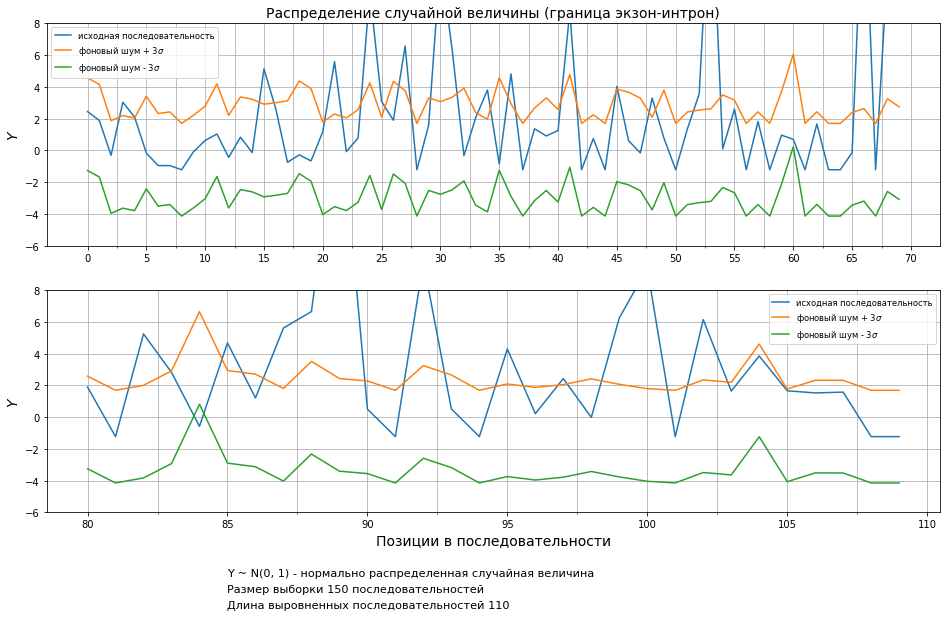

In [ ]:
# Построение графиков

fontsize = 14
fig, axes = plt.subplots(2, 1, figsize=(16,9))

# # общий график
# axes[0].set_ylabel('$Y$', fontsize=fontsize)
# axes[0].plot(normal_arg, label=label)
# axes[0].plot(normal_arg_noise, label=label_noise)
# axes[0].legend(fontsize=fontsize*0.6)

# График в заданных диапазонах
major_ticks_x = np.arange(0, 125, 5)
minor_ticks_x = np.arange(0, 125, 2.5)
major_ticks_y = np.arange(-50, 51, 2)
# minor_ticks_y = np.arange(0, 101, 2)

for i in range(0,2):
  axes[i].set_xticks(major_ticks_x)
  axes[i].set_xticks(minor_ticks_x, minor=True)
  axes[i].set_yticks(major_ticks_y)
  # ax.set_yticks(minor_ticks_y, minor=True)

  axes[i].set_ylim(-6, 8)
  axes[i].set_ylabel('$Y$', fontsize=fontsize)
  axes[i].grid(which='both')


bottom = 80
top = 70

axes[0].set_title('Распределение случайной величины (граница экзон-интрон)', fontsize=fontsize)

axes[0].plot(normal_arg[0:top], label=label)
axes[0].plot(normal_arg_noise_1[0:top], label=label_noise_1)
axes[0].plot(normal_arg_noise_2[0:top], label=label_noise_2)

axes[0].legend(fontsize=fontsize*0.6)


axes[1].plot(range(bottom, len(normal_arg)), normal_arg[bottom:], label=label)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_1[bottom:], label=label_noise_1)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_2[bottom:], label=label_noise_2)

axes[1].set_xlabel('Позиции в последовательности', fontsize=fontsize)
axes[1].legend(fontsize=fontsize*0.6)

axes[1].annotate(s='Y ~ N(0, 1) - нормально распределенная случайная величина', xy=(85, -10), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Размер выборки {len(lines)} последовательностей', xy=(85, -11), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Длина выровненных последовательностей {len(normal_arg)}', xy=(85, -12), annotation_clip=False, fontsize=fontsize*0.8)


plt.show
plt.savefig(save_to_path + f'normal_arg_dist_exon_intron_l110(tcoffee).jpeg', bbox_inches='tight')

In [ ]:
# Исследуемая выборка
file = 'intron_exon_150_l110.sto'
chi_square = ''
label = 'исходная последовательность'


# Получение хи-квадрат величины
file_name = file.split('.')[0]

if file_name.split('_')[0] == 'intron':
  # преобработка
  lines = preproc(file)

  # хи-квадрат распределение
  chi_square = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg = (chi_square - df) / np.sqrt(2 * df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# Фоновый шум
chi_square_noise = ''
label_noise = 'фоновый шум'

# Получение хи-квадрат величины
lines = preproc(file)

line_len = len(lines[0])
lines = ''.join(lines)

data_shuffled = list(''.join(lines.split('.')))
lines = list(lines)

np.random.shuffle(data_shuffled)

index = 0
for i in range(len(lines)):
  if lines[i] != '.':
    lines[i] = data_shuffled[index]
    index += 1

lines = np.array(lines).reshape(150, line_len)
lines = [''.join(line) for line in lines]

chi_square_noise = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg_noise = (chi_square_noise - df) / np.sqrt(2 * df)

# Добавление 3-сигма
label_noise_1 = 'фоновый шум + $3\sigma$'
label_noise_2 = 'фоновый шум - $3\sigma$'

std_noise = np.std(normal_arg_noise)
normal_arg_noise_1 = normal_arg_noise + 3 * std_noise
normal_arg_noise_2 = normal_arg_noise - 3 * std_noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


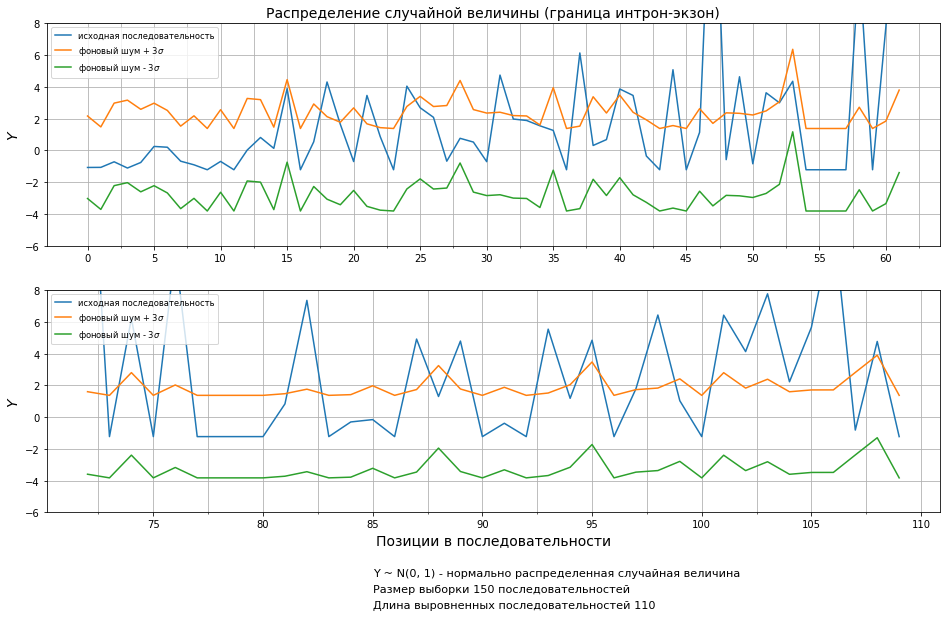

In [ ]:
# Построение графиков

fontsize = 14
fig, axes = plt.subplots(2, 1, figsize=(16,9))

# # общий график
# axes[0].set_ylabel('$Y$', fontsize=fontsize)
# axes[0].plot(normal_arg, label=label)
# axes[0].plot(normal_arg_noise, label=label_noise)
# axes[0].legend(fontsize=fontsize*0.6)

# График в заданных диапазонах
major_ticks_x = np.arange(0, 125, 5)
minor_ticks_x = np.arange(0, 125, 2.5)
major_ticks_y = np.arange(-50, 51, 2)
# minor_ticks_y = np.arange(0, 101, 2)

for i in range(0,2):
  axes[i].set_xticks(major_ticks_x)
  axes[i].set_xticks(minor_ticks_x, minor=True)
  axes[i].set_yticks(major_ticks_y)
  # ax.set_yticks(minor_ticks_y, minor=True)

  axes[i].set_ylim(-6, 8)
  axes[i].set_ylabel('$Y$', fontsize=fontsize)
  axes[i].grid(which='both')


bottom = 72
top = 62

axes[0].set_title('Распределение случайной величины (граница интрон-экзон)', fontsize=fontsize)

axes[0].plot(normal_arg[0:top], label=label)
axes[0].plot(normal_arg_noise_1[0:top], label=label_noise_1)
axes[0].plot(normal_arg_noise_2[0:top], label=label_noise_2)

axes[0].legend(fontsize=fontsize*0.6)


axes[1].plot(range(bottom, len(normal_arg)), normal_arg[bottom:], label=label)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_1[bottom:], label=label_noise_1)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_2[bottom:], label=label_noise_2)

axes[1].set_xlabel('Позиции в последовательности', fontsize=fontsize)
axes[1].legend(fontsize=fontsize*0.6)

axes[1].annotate(s='Y ~ N(0, 1) - нормально распределенная случайная величина', xy=(85, -10), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Размер выборки {len(lines)} последовательностей', xy=(85, -11), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Длина выровненных последовательностей {len(normal_arg)}', xy=(85, -12), annotation_clip=False, fontsize=fontsize*0.8)


plt.show
plt.savefig(save_to_path + f'normal_arg_dist_intron_exon_l110(tcoffee).jpeg', bbox_inches='tight')

In [ ]:
# Исследуемая выборка
file = 'exon_intron_150_l120.sto'
chi_square = ''
label = 'исходная последовательность'


# Получение хи-квадрат величины
file_name = file.split('.')[0]

if file_name.split('_')[0] == 'exon':
  # преобработка
  lines = preproc(file)

  # хи-квадрат распределение
  chi_square = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg = (chi_square - df) / np.sqrt(2 * df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# Фоновый шум
chi_square_noise = ''
label_noise = 'фоновый шум'

# Получение хи-квадрат величины
lines = preproc(file)

line_len = len(lines[0])
lines = ''.join(lines)

data_shuffled = list(''.join(lines.split('.')))
lines = list(lines)

np.random.shuffle(data_shuffled)

index = 0
for i in range(len(lines)):
  if lines[i] != '.':
    lines[i] = data_shuffled[index]
    index += 1

lines = np.array(lines).reshape(150, line_len)
lines = [''.join(line) for line in lines]

chi_square_noise = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg_noise = (chi_square_noise - df) / np.sqrt(2 * df)

# Добавление 3-сигма
label_noise_1 = 'фоновый шум + $3\sigma$'
label_noise_2 = 'фоновый шум - $3\sigma$'

std_noise = np.std(normal_arg_noise)
normal_arg_noise_1 = normal_arg_noise + 3 * std_noise
normal_arg_noise_2 = normal_arg_noise - 3 * std_noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


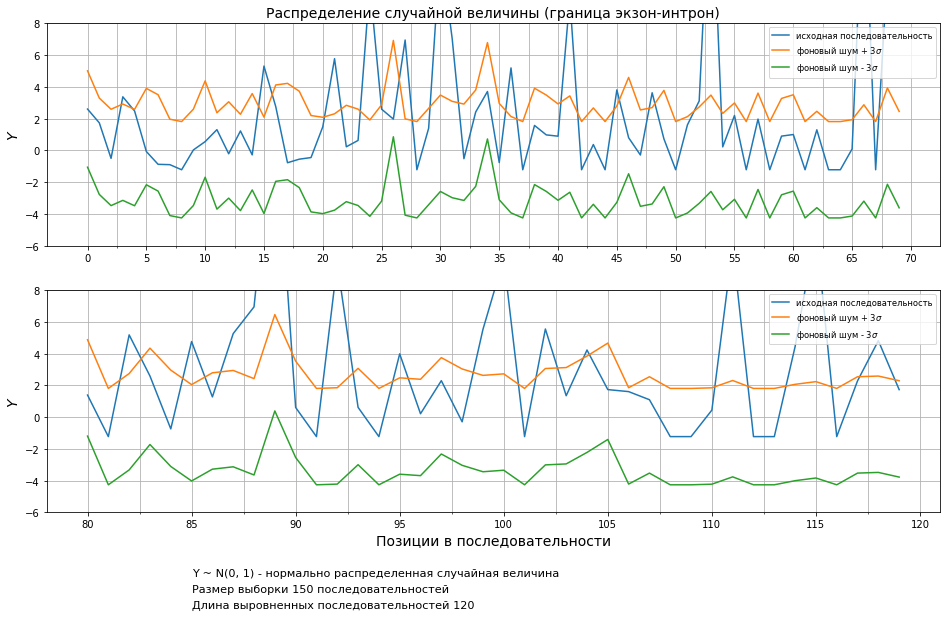

In [ ]:
# Построение графиков

fontsize = 14
fig, axes = plt.subplots(2, 1, figsize=(16,9))

# # общий график
# axes[0].set_ylabel('$Y$', fontsize=fontsize)
# axes[0].plot(normal_arg, label=label)
# axes[0].plot(normal_arg_noise, label=label_noise)
# axes[0].legend(fontsize=fontsize*0.6)

# График в заданных диапазонах
major_ticks_x = np.arange(0, 125, 5)
minor_ticks_x = np.arange(0, 125, 2.5)
major_ticks_y = np.arange(-50, 51, 2)
# minor_ticks_y = np.arange(0, 101, 2)

for i in range(0,2):
  axes[i].set_xticks(major_ticks_x)
  axes[i].set_xticks(minor_ticks_x, minor=True)
  axes[i].set_yticks(major_ticks_y)
  # ax.set_yticks(minor_ticks_y, minor=True)

  axes[i].set_ylim(-6, 8)
  axes[i].set_ylabel('$Y$', fontsize=fontsize)
  axes[i].grid(which='both')


bottom = 80
top = 70

axes[0].set_title('Распределение случайной величины (граница экзон-интрон)', fontsize=fontsize)

axes[0].plot(normal_arg[0:top], label=label)
axes[0].plot(normal_arg_noise_1[0:top], label=label_noise_1)
axes[0].plot(normal_arg_noise_2[0:top], label=label_noise_2)

axes[0].legend(fontsize=fontsize*0.6)


axes[1].plot(range(bottom, len(normal_arg)), normal_arg[bottom:], label=label)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_1[bottom:], label=label_noise_1)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_2[bottom:], label=label_noise_2)

axes[1].set_xlabel('Позиции в последовательности', fontsize=fontsize)
axes[1].legend(fontsize=fontsize*0.6)

axes[1].annotate(s='Y ~ N(0, 1) - нормально распределенная случайная величина', xy=(85, -10), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Размер выборки {len(lines)} последовательностей', xy=(85, -11), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Длина выровненных последовательностей {len(normal_arg)}', xy=(85, -12), annotation_clip=False, fontsize=fontsize*0.8)


plt.show
plt.savefig(save_to_path + f'normal_arg_dist_exon_intron_l120(tcoffee).jpeg', bbox_inches='tight')

In [ ]:
# Исследуемая выборка
file = 'intron_exon_150_l120.sto'
chi_square = ''
label = 'исходная последовательность'


# Получение хи-квадрат величины
file_name = file.split('.')[0]

if file_name.split('_')[0] == 'intron':
  # преобработка
  lines = preproc(file)

  # хи-квадрат распределение
  chi_square = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg = (chi_square - df) / np.sqrt(2 * df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# Фоновый шум
chi_square_noise = ''
label_noise = 'фоновый шум'

# Получение хи-квадрат величины
lines = preproc(file)

line_len = len(lines[0])
lines = ''.join(lines)

data_shuffled = list(''.join(lines.split('.')))
lines = list(lines)

np.random.shuffle(data_shuffled)

index = 0
for i in range(len(lines)):
  if lines[i] != '.':
    lines[i] = data_shuffled[index]
    index += 1

lines = np.array(lines).reshape(150, line_len)
lines = [''.join(line) for line in lines]

chi_square_noise = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg_noise = (chi_square_noise - df) / np.sqrt(2 * df)

# Добавление 3-сигма
label_noise_1 = 'фоновый шум + $3\sigma$'
label_noise_2 = 'фоновый шум - $3\sigma$'

std_noise = np.std(normal_arg_noise)
normal_arg_noise_1 = normal_arg_noise + 3 * std_noise
normal_arg_noise_2 = normal_arg_noise - 3 * std_noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


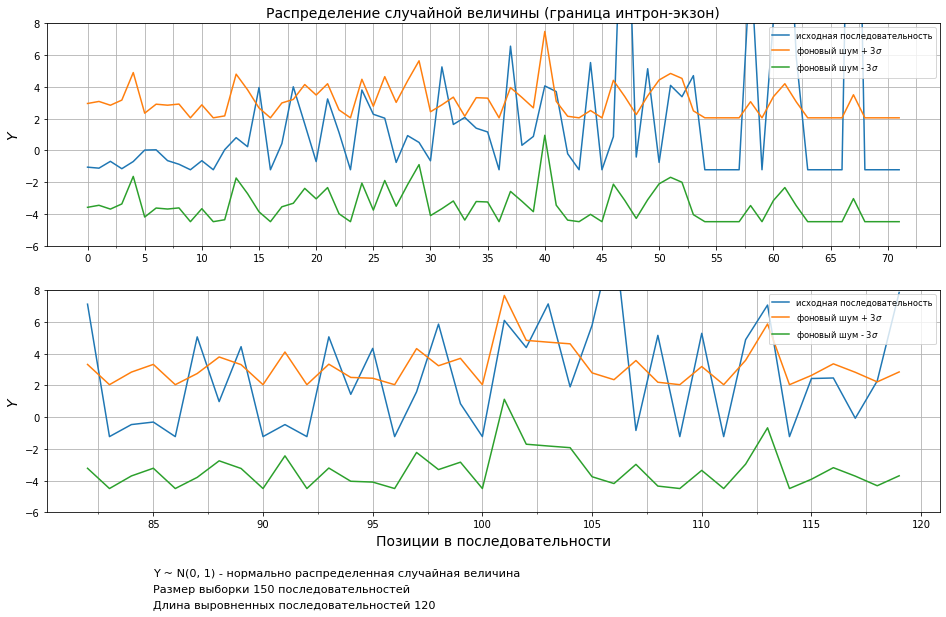

In [ ]:
# Построение графиков

fontsize = 14
fig, axes = plt.subplots(2, 1, figsize=(16,9))

# # общий график
# axes[0].set_ylabel('$Y$', fontsize=fontsize)
# axes[0].plot(normal_arg, label=label)
# axes[0].plot(normal_arg_noise, label=label_noise)
# axes[0].legend(fontsize=fontsize*0.6)

# График в заданных диапазонах
major_ticks_x = np.arange(0, 125, 5)
minor_ticks_x = np.arange(0, 125, 2.5)
major_ticks_y = np.arange(-50, 51, 2)
# minor_ticks_y = np.arange(0, 101, 2)

for i in range(0,2):
  axes[i].set_xticks(major_ticks_x)
  axes[i].set_xticks(minor_ticks_x, minor=True)
  axes[i].set_yticks(major_ticks_y)
  # ax.set_yticks(minor_ticks_y, minor=True)

  axes[i].set_ylim(-6, 8)
  axes[i].set_ylabel('$Y$', fontsize=fontsize)
  axes[i].grid(which='both')


bottom = 82
top = 72

axes[0].set_title('Распределение случайной величины (граница интрон-экзон)', fontsize=fontsize)

axes[0].plot(normal_arg[0:top], label=label)
axes[0].plot(normal_arg_noise_1[0:top], label=label_noise_1)
axes[0].plot(normal_arg_noise_2[0:top], label=label_noise_2)

axes[0].legend(fontsize=fontsize*0.6)


axes[1].plot(range(bottom, len(normal_arg)), normal_arg[bottom:], label=label)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_1[bottom:], label=label_noise_1)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_2[bottom:], label=label_noise_2)

axes[1].set_xlabel('Позиции в последовательности', fontsize=fontsize)
axes[1].legend(fontsize=fontsize*0.6)

axes[1].annotate(s='Y ~ N(0, 1) - нормально распределенная случайная величина', xy=(85, -10), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Размер выборки {len(lines)} последовательностей', xy=(85, -11), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Длина выровненных последовательностей {len(normal_arg)}', xy=(85, -12), annotation_clip=False, fontsize=fontsize*0.8)


plt.show
plt.savefig(save_to_path + f'normal_arg_dist_intron_exon_l120(tcoffee).jpeg', bbox_inches='tight')

In [ ]:
# Исследуемая выборка
file = 'exon_intron_150.sto'
chi_square = ''
label = 'исходная последовательность'


# Получение хи-квадрат величины
file_name = file.split('.')[0]

if file_name.split('_')[0] == 'exon':
  # преобработка
  lines = preproc(file)

  # хи-квадрат распределение
  chi_square = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg = (chi_square - df) / np.sqrt(2 * df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# Фоновый шум
chi_square_noise = ''
label_noise = 'фоновый шум'

# Получение хи-квадрат величины
lines = preproc(file)

line_len = len(lines[0])
lines = ''.join(lines)

data_shuffled = list(''.join(lines.split('.')))
lines = list(lines)

np.random.shuffle(data_shuffled)

index = 0
for i in range(len(lines)):
  if lines[i] != '.':
    lines[i] = data_shuffled[index]
    index += 1

lines = np.array(lines).reshape(150, line_len)
lines = [''.join(line) for line in lines]

chi_square_noise = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg_noise = (chi_square_noise - df) / np.sqrt(2 * df)

# Добавление 3-сигма
label_noise_1 = 'фоновый шум + $3\sigma$'
label_noise_2 = 'фоновый шум - $3\sigma$'

std_noise = np.std(normal_arg_noise)
normal_arg_noise_1 = normal_arg_noise + 3 * std_noise
normal_arg_noise_2 = normal_arg_noise - 3 * std_noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


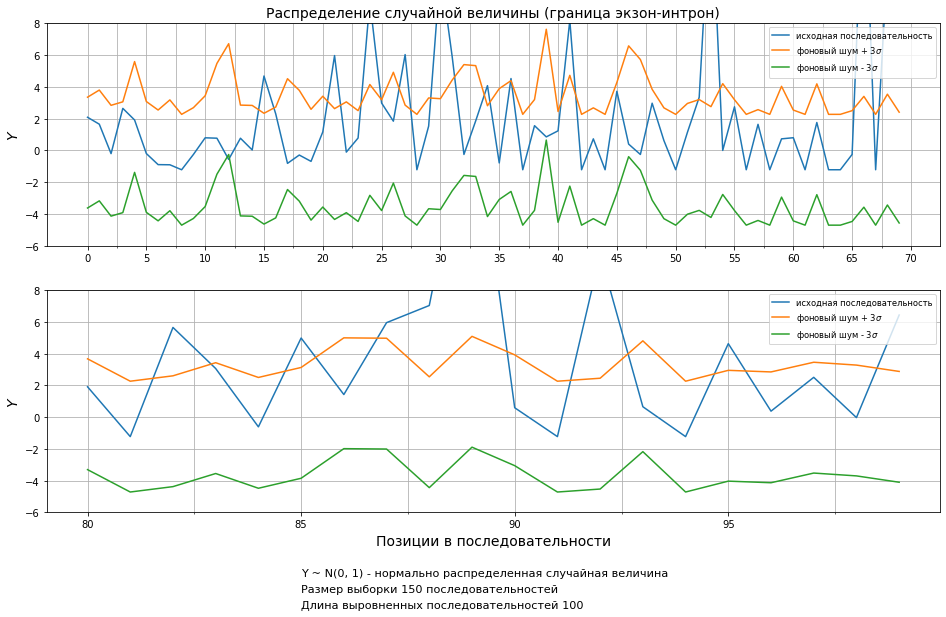

In [ ]:
# Построение графиков

fontsize = 14
fig, axes = plt.subplots(2, 1, figsize=(16,9))

# # общий график
# axes[0].set_ylabel('$Y$', fontsize=fontsize)
# axes[0].plot(normal_arg, label=label)
# axes[0].plot(normal_arg_noise, label=label_noise)
# axes[0].legend(fontsize=fontsize*0.6)

# График в заданных диапазонах
major_ticks_x = np.arange(0, 125, 5)
minor_ticks_x = np.arange(0, 125, 2.5)
major_ticks_y = np.arange(-50, 51, 2)
# minor_ticks_y = np.arange(0, 101, 2)

for i in range(0,2):
  axes[i].set_xticks(major_ticks_x)
  axes[i].set_xticks(minor_ticks_x, minor=True)
  axes[i].set_yticks(major_ticks_y)
  # ax.set_yticks(minor_ticks_y, minor=True)

  axes[i].set_ylim(-6, 8)
  axes[i].set_ylabel('$Y$', fontsize=fontsize)
  axes[i].grid(which='both')


bottom = 80
top = 70

axes[0].set_title('Распределение случайной величины (граница экзон-интрон)', fontsize=fontsize)

axes[0].plot(normal_arg[0:top], label=label)
axes[0].plot(normal_arg_noise_1[0:top], label=label_noise_1)
axes[0].plot(normal_arg_noise_2[0:top], label=label_noise_2)

axes[0].legend(fontsize=fontsize*0.6)


axes[1].plot(range(bottom, len(normal_arg)), normal_arg[bottom:], label=label)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_1[bottom:], label=label_noise_1)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_2[bottom:], label=label_noise_2)

axes[1].set_xlabel('Позиции в последовательности', fontsize=fontsize)
axes[1].legend(fontsize=fontsize*0.6)

axes[1].annotate(s='Y ~ N(0, 1) - нормально распределенная случайная величина', xy=(85, -10), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Размер выборки {len(lines)} последовательностей', xy=(85, -11), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Длина выровненных последовательностей {len(normal_arg)}', xy=(85, -12), annotation_clip=False, fontsize=fontsize*0.8)


plt.show
plt.savefig(save_to_path + f'normal_arg_dist_exon_intron(tcoffee).jpeg', bbox_inches='tight')

In [ ]:
# Исследуемая выборка
file = 'intron_exon_150.sto'
chi_square = ''
label = 'исходная последовательность'


# Получение хи-квадрат величины
file_name = file.split('.')[0]

if file_name.split('_')[0] == 'intron':
  # преобработка
  lines = preproc(file)

  # хи-квадрат распределение
  chi_square = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg = (chi_square - df) / np.sqrt(2 * df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# Фоновый шум
chi_square_noise = ''
label_noise = 'фоновый шум'

# Получение хи-квадрат величины
lines = preproc(file)

line_len = len(lines[0])
lines = ''.join(lines)

data_shuffled = list(''.join(lines.split('.')))
lines = list(lines)

np.random.shuffle(data_shuffled)

index = 0
for i in range(len(lines)):
  if lines[i] != '.':
    lines[i] = data_shuffled[index]
    index += 1

lines = np.array(lines).reshape(150, line_len)
lines = [''.join(line) for line in lines]

chi_square_noise = main(lines)


# Сведение к нормальной величине
df = 3      # степеней свободы 
normal_arg_noise = (chi_square_noise - df) / np.sqrt(2 * df)

# Добавление 3-сигма
label_noise_1 = 'фоновый шум + $3\sigma$'
label_noise_2 = 'фоновый шум - $3\sigma$'

std_noise = np.std(normal_arg_noise)
normal_arg_noise_1 = normal_arg_noise + 3 * std_noise
normal_arg_noise_2 = normal_arg_noise - 3 * std_noise

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


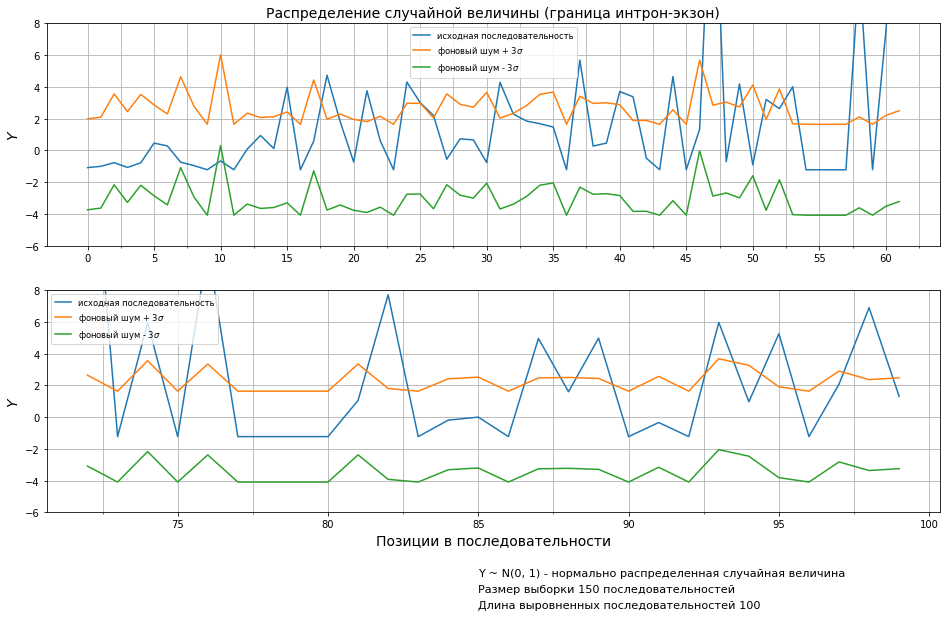

In [ ]:
# Построение графиков

fontsize = 14
fig, axes = plt.subplots(2, 1, figsize=(16,9))

# # общий график
# axes[0].set_ylabel('$Y$', fontsize=fontsize)
# axes[0].plot(normal_arg, label=label)
# axes[0].plot(normal_arg_noise, label=label_noise)
# axes[0].legend(fontsize=fontsize*0.6)

# График в заданных диапазонах
major_ticks_x = np.arange(0, 125, 5)
minor_ticks_x = np.arange(0, 125, 2.5)
major_ticks_y = np.arange(-50, 51, 2)
# minor_ticks_y = np.arange(0, 101, 2)

for i in range(0,2):
  axes[i].set_xticks(major_ticks_x)
  axes[i].set_xticks(minor_ticks_x, minor=True)
  axes[i].set_yticks(major_ticks_y)
  # ax.set_yticks(minor_ticks_y, minor=True)

  axes[i].set_ylim(-6, 8)
  axes[i].set_ylabel('$Y$', fontsize=fontsize)
  axes[i].grid(which='both')


bottom = 72
top = 62

axes[0].set_title('Распределение случайной величины (граница интрон-экзон)', fontsize=fontsize)

axes[0].plot(normal_arg[0:top], label=label)
axes[0].plot(normal_arg_noise_1[0:top], label=label_noise_1)
axes[0].plot(normal_arg_noise_2[0:top], label=label_noise_2)

axes[0].legend(fontsize=fontsize*0.6)


axes[1].plot(range(bottom, len(normal_arg)), normal_arg[bottom:], label=label)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_1[bottom:], label=label_noise_1)
axes[1].plot(range(bottom, len(normal_arg)), normal_arg_noise_2[bottom:], label=label_noise_2)

axes[1].set_xlabel('Позиции в последовательности', fontsize=fontsize)
axes[1].legend(fontsize=fontsize*0.6)

axes[1].annotate(s='Y ~ N(0, 1) - нормально распределенная случайная величина', xy=(85, -10), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Размер выборки {len(lines)} последовательностей', xy=(85, -11), annotation_clip=False, fontsize=fontsize*0.8)
axes[1].annotate(s=f'Длина выровненных последовательностей {len(normal_arg)}', xy=(85, -12), annotation_clip=False, fontsize=fontsize*0.8)


plt.show
plt.savefig(save_to_path + f'normal_arg_dist_intron_exon(tcoffee).jpeg', bbox_inches='tight')

##### 2.Распределение хи-квадрат

In [ ]:
# plt.figure(figsize=(14,8))

# x = np.sort(chi_square)


# plt.plot(x, chi2.pdf(x, df), label=label)

In [ ]:
# fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# fontsize = 12
# tick_labelsize = 10

# axes[0].set_title('Density of $\chi^2$', fontsize=fontsize)
# axes[0].set_xlabel('x', fontsize=fontsize)
# axes[0].set_ylabel('$f_{\chi^2}(x)$',   fontsize=fontsize)

# axes[1].set_title('Distribution function of $\chi^2$', fontsize=fontsize)
# axes[1].set_xlabel('x', fontsize=fontsize)
# axes[1].set_ylabel('$F_{\chi^2}(x)$', fontsize=fontsize)

# axes[2].set_title('$-lg(f_{\chi^2}(x))$ of $\chi^2$', fontsize=fontsize)
# axes[2].set_xlabel('x', fontsize=fontsize)
# axes[2].set_ylabel('$-lg(f_{\chi^2}(x))$', fontsize=fontsize)


# plt.tick_params(labelsize=tick_labelsize) 
# plt.tight_layout()

# # for i in range(len(chi_squares)):
# x = np.sort(chi_square)
# x_noise = np.sort(chi_square_noise)

# top = np.argwhere(x > 50)[0,0]
# x = x[0:top]
# x_noise = x_noise[0:top]

# axes[0].plot(x, chi2.pdf(x, df), label=label)  
# # axes[0].plot(x_noise, chi2.pdf(x_noise, df), label=label_noise)  

# axes[1].plot(x, chi2.cdf(x, df), label=label)  
# # axes[1].plot(x_noise, chi2.cdf(x_noise, df), label=label_noise)  

# axes[2].plot(x, (-1)*np.log10(chi2.pdf(x, df)), label=label)
# # axes[2].plot(x_noise, (-1)*np.log10(chi2.pdf(x_noise, df)), label=label_noise)

# axes[0].legend(fontsize=fontsize)
# axes[1].legend(fontsize=fontsize)
# axes[2].legend(fontsize=fontsize)

In [ ]:
# files

['intron_exon_300.sto',
 'intron_exon_100.sto',
 'exon_intron_500.sto',
 'intron_exon_500.sto',
 'exon_intron_100.sto',
 'exon_intron_300.sto',
 'Graphs']

In [ ]:
# file = 'intron_exon_500.sto'

In [ ]:
# # labels = []
# # chi_squares = []

# # for file in files[1:]:
# file_name = file.split('.')[0]

# if file_name.split('_')[0] == 'intron':
#   # преобработка
#   lines = preproc(file)

#   # хи-квадрат распределение
#   chi_square = main(lines)
  
#   label = 'исходная последовательность'
#   # label = file_name
#   # labels.append(file_name)
#   # chi_squares.append(chi_square)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  



<p>Далее, алгоритму HMMER передан построенный профиль и файл, содержащую исследуюмую последовательность.</p>

<p>Для оценки подобия используется оценка e-value, которая в отличие от p-value, учитывает размер выборки. Среди всех подобий отобраны те, чтьи значения e-value < 10.</p>

<p>Найденные подобия сопоставлены с известными границами экзон-интрон и интрон-экзон.</p>

### Алгоритм T-Coffee

#График выборка 150 от T-Coffee
#Вероятность хи-квадрат и лог10
#T-Coffee -> HMMER

In [ ]:
# index = 0

# while index < len(lines[0]):
#   if freq_arr[freq_arr < L / 2]

In [ ]:
# index = 0

# while index < len(lines[0]):
#   flag = 0
  
#   for j in range(len(lines)):
#     if lines[j][index] == '.':
#       flag = 1
#       break
  
#   if flag == 1:
#     for j in range(len(lines)):
#       lines[j] = lines[j][:index] + lines[j][index + 1:]
#   else:
#     index += 1

# lines

In [ ]:
# N = len(lines[0])
# N

93

In [ ]:
# PA = [0] * N
# PG = [0] * N
# PC = [0] * N
# PT = [0] * N

# for i in range(N):
#   for k in range(len(lines)):
#     if lines[k][i] == 'A':
#       PA[i] += 1
#     elif lines[k][i] == 'G':
#       PG[i] += 1
#     elif lines[k][i] == 'C':
#       PC[i] += 1
#     elif lines[k][i] == 'T':
#       PT[i] += 1

In [ ]:
# PA = np.array(PA)
# PG = np.array(PG)
# PC = np.array(PC)
# PT = np.array(PT)

# # PA = PA / len(lines) / N
# # PG = PG / len(lines) / N
# # PC = PC / len(lines) / N
# # PT = PT / len(lines) / N

# PA = PA / len(lines)
# PG = PG / len(lines)
# PC = PC / len(lines)
# PT = PT / len(lines)

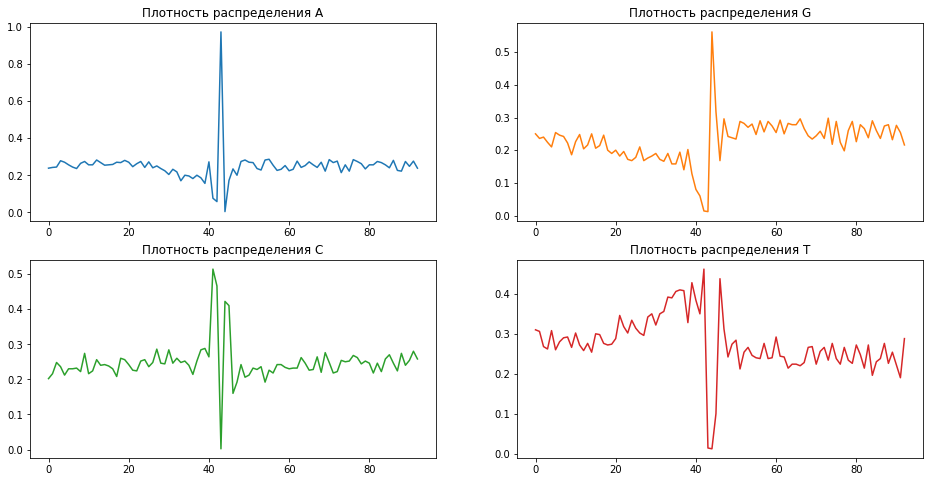

In [ ]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8));

# ax1.plot(PA);
# ax1.set_title('Плотность распределения A')

# ax2.plot(PG, color='tab:orange');
# ax2.set_title('Плотность распределения G')

# ax3.plot(PC, color='tab:green');
# ax3.set_title('Плотность распределения С')

# ax4.plot(PT, color='tab:red');
# ax4.set_title('Плотность распределения T')

# plt.savefig(f'./Graphs/i_e_AGTC_distribution_{n}.jpeg')

In [ ]:
# ma = np.mean(PA)
# mg = np.mean(PG)
# mc = np.mean(PC)
# mt = np.mean(PT)

# PA = ma - PA
# PG = mg - PG
# PC = mc - PC
# PT = mt - PT

In [ ]:
# chi_square = np.square(PA) + np.square(PG) + np.square(PC) + np.square(PT)

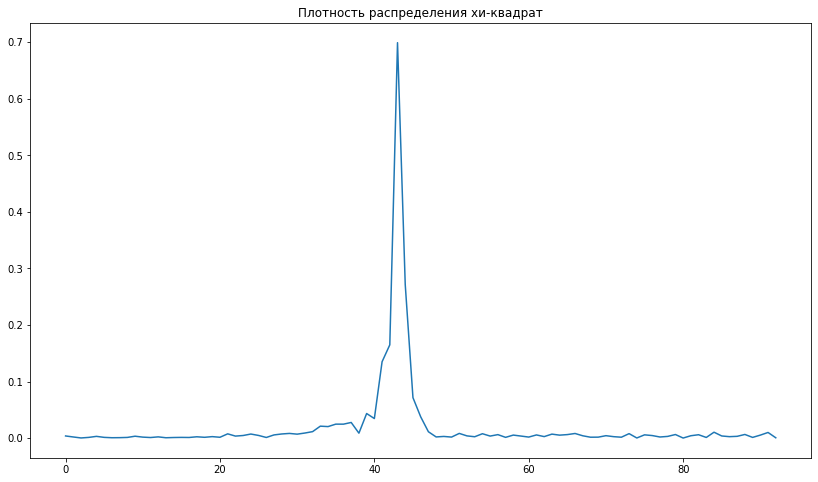

In [ ]:
# plt.figure(figsize=(14, 8));
# plt.plot(chi_square);
# plt.title('Плотность распределения хи-квадрат')

# plt.savefig(f'./Graphs/i_e_chi_square_distribution_{n}.jpeg')

In [ ]:


# exons_list = []

# for mRNA in mRNAs_prep:
#   # header = mRNA.split('\n')[0].split('\t')
  
#   # start  = header[0]
#   # end    = header[1]
#   # parent_id = header[5].split(';')[1].split(':')[1]

#   seq_types = mRNA.split('\n')[1:]
#   exons = []
#   for line in seq_types:
#     if '	exon	' in line:
#       header = line.split('\t')
      
#       start  = int(header[3])
#       end    = int(header[4])
#       parent_id = header[8].split(';')[0].split(':')[1]

#       exon_dict = {'start':     start, 
#                    'end':       end,
#                    'parent_id': parent_id}
#       exons.append(exon_dict)

#   exons_list.append(exons)







#   # mRNA_dict = {'start':     start, 
#   #              'end':       end,
#   #              'parent_id': parent_id,
#   #              'exons':     exons}
#   # mRNAs_dicts.append(mRNA_dict)

In [ ]:


# for exons in exons_list:
#   # exons = mRNA['exons']
#   # exons_dicts = []

#   for i in range(len(exons)):
#     header = exons[i].split('\t')

#     start  = int(header[3])
#     end    = int(header[4])
#     parent_id = header[8].split(';')[0].split(':')[1]

#     exon_dict = {'start':     start, 
#                'end':       end,
#                'parent_id': parent_id}
#     exons[i] = exon_dict
#     # exons_dicts.append(exon_dict)
    
#   # mRNA['exons'] = exons_dicts